In [1]:
%load_ext autoreload
%autoreload 2

# Cov BHM model

In [2]:
import pandas as pd
from seminartools.data import read_inflation, read_merged

In [3]:
df = read_merged().reset_index()
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [4]:
from seminartools.models.cov_bhm_model import CovBHMModel

model = CovBHMModel()
model

In [5]:
model.fit(df)

[10.422768    2.41997814  1.28169245  1.23835428  0.95526524  0.89286078
  0.76348455  0.71976437  0.02128137  0.08264375  0.54394711  0.48826834
  0.41925132  0.14805624  0.18509476  0.21524167  0.32881994  0.31961964
  0.28091768  0.27269038]


Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00, 273.69it/s]


In [6]:
import arviz as az

az.summary(model.trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercepts_rotated_[0],-0.299,0.071,-0.426,-0.160,0.001,0.001,5051.0,4475.0,1.0
intercepts_rotated_[1],0.215,0.075,0.075,0.350,0.001,0.001,4952.0,4942.0,1.0
intercepts_rotated_[2],0.178,0.112,-0.025,0.402,0.001,0.001,7141.0,5006.0,1.0
intercepts_rotated_[3],0.175,0.082,0.022,0.327,0.001,0.001,7371.0,4188.0,1.0
intercepts_rotated_[4],-0.197,0.092,-0.371,-0.027,0.001,0.001,8529.0,4790.0,1.0
...,...,...,...,...,...,...,...,...,...
regression_coefficients_inflation_lag_1[15],0.008,0.103,-0.182,0.199,0.001,0.001,7391.0,5214.0,1.0
regression_coefficients_inflation_lag_1[16],0.463,0.105,0.262,0.656,0.001,0.001,6812.0,5156.0,1.0
regression_coefficients_inflation_lag_1[17],0.132,0.124,-0.102,0.360,0.001,0.001,10141.0,4516.0,1.0
regression_coefficients_inflation_lag_1[18],0.205,0.125,-0.036,0.439,0.001,0.001,9006.0,5221.0,1.0


In [7]:
x = az.summary(model.trace)
# all index starting with interceps
x = x[x.index.str.startswith("intercepts[")]
x

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercepts[0],-0.313,0.074,-0.446,-0.168,0.001,0.001,5051.0,4475.0,1.0
intercepts[1],0.058,0.061,-0.051,0.178,0.001,0.001,6014.0,4972.0,1.0
intercepts[2],0.083,0.062,-0.031,0.199,0.001,0.001,8759.0,5032.0,1.0
intercepts[3],0.146,0.065,0.023,0.264,0.001,0.001,7798.0,4899.0,1.0
intercepts[4],-0.036,0.068,-0.168,0.088,0.001,0.001,9444.0,5426.0,1.0
intercepts[5],-0.660,0.159,-0.960,-0.363,0.004,0.003,1671.0,2989.0,1.0
intercepts[6],-0.116,0.085,-0.274,0.043,0.001,0.001,7182.0,5049.0,1.0
intercepts[7],-0.226,0.101,-0.404,-0.023,0.002,0.001,4032.0,4401.0,1.0
intercepts[8],-0.223,0.083,-0.374,-0.064,0.001,0.001,8005.0,4778.0,1.0
intercepts[9],-0.180,0.082,-0.337,-0.024,0.001,0.001,8735.0,5424.0,1.0


Text(0.5, 1.0, 'Regression intercept per country')

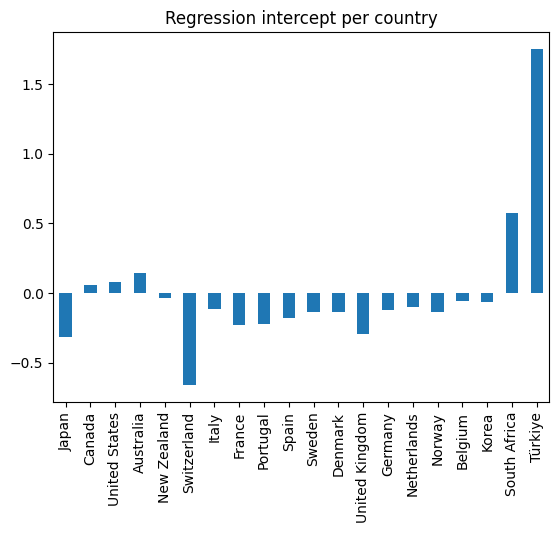

In [8]:
import matplotlib.pyplot as plt
x.set_index(model.countries)["mean"].plot.bar()
plt.title("Regression intercept per country")

# Prediction

In [9]:
preds = model.predict(df)
preds

,country,inflation,date
0,Australia,0.015468,2023-04-01
1,Belgium,0.017568,2023-04-01
2,Canada,0.006596,2023-04-01
3,Denmark,0.007534,2023-04-01
4,France,0.005727,2023-04-01
5,Germany,0.011968,2023-04-01
6,Italy,0.023663,2023-04-01
7,Japan,0.004928,2023-04-01
8,Korea,0.005960,2023-04-01
9,Netherlands,0.008591,2023-04-01
